In [1]:
import tensorflow as tf
from Q_funcs import *
import numpy as np
import h5py
from matplotlib import pyplot as plt
np.random.seed(73)

In [2]:
def show_data(x_in, pre_in):
    mean = np.mean(x_in)
    std = np.std(x_in)
    Max = np.max(x_in)
    Min = np.min(x_in)
    dtype = x_in.dtype

    print(pre_in + ' shape: ' + str(x_in.shape) + ' , type: ' + str(dtype) + ' , mean = ' + str(mean)
          + ' , std = ' + str(std) + ' , Max = ' + str(Max) + ' , Min = ' + str(Min))

In [3]:
def iter_for_y_bits_y(basis_in, niter, up_r):
    basisin = basis_in.copy()
    for it in range(niter):
        bits_yo = bits_y_p.eval(feed_dict={x_in:xin,basis:basisin})
        y_clipo = y_clip_p.eval(feed_dict={x_in:xin,basis:basisin})
        new_basiso = New_basis(bits_yo, xin, nbit, basisin)

        d_basis = up_r*(new_basiso - basisin)
        basisin = basisin + d_basis
        
    bits_yo = bits_y_p.eval(feed_dict={x_in:xin,basis:basisin})
    y_clipo = y_clip_p.eval(feed_dict={x_in:xin,basis:basisin})
    
    return y_clipo, bits_yo, basisin

In [4]:
nx = 256; ny =448
nbit = 7  #Choose number of bit for quantization

x_in, basis = get_placeholder(nx, ny, nbit)
print('x_in: ' + str(x_in))
print('basis: ' + str(basis))

x_in: Tensor("Placeholder:0", shape=(256, 448), dtype=float32)
basis: Tensor("Placeholder_1:0", shape=(7, 1), dtype=float32)


In [5]:
init_level_multiplier, init_thrs_multiplier = get_multipliers(nbit)

print('init_level_multiplier:\n' + str(init_level_multiplier))
print('init_thrs_multiplier:\n' + str(init_thrs_multiplier))

init_level_multiplier:
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0

In [6]:
flag_train = 0
y_clip_p, bits_y_p, new_basis_p = q_run(x_in, basis, nbit, flag_train, init_level_multiplier, init_thrs_multiplier)

print('y_clip_p: ' + str(y_clip_p))
print('bits_y_p: ' + str(bits_y_p))
print('new_basis_p: ' + str(new_basis_p))

y_clip_p: Tensor("add_382:0", shape=(256, 448), dtype=float32)
bits_y_p: Tensor("Select_253:0", shape=(?, 7), dtype=float32)
new_basis_p: 0


## Run and see

  dt shape: (256, 448) , type: int16 , mean = 2.806248256138393 , std = 3.5111350824193766 , Max = 40 , Min = -20


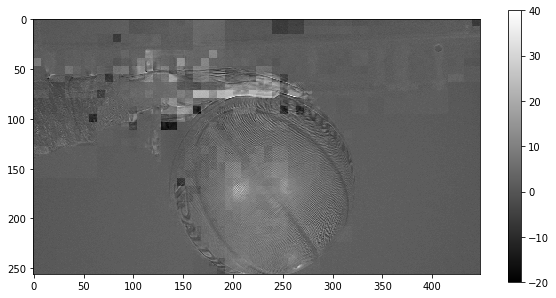

In [7]:
fname = './resid_MC_CI_3.h5'

ft=h5py.File(fname,'r')
dt=ft['data'][:]
show_data(dt, '  dt')

plt.figure(figsize=(10, 5))
plt.imshow(dt,cmap='gray')
plt.colorbar()
plt.show()

## One can choose different normalization for test purposes

In [8]:
#ava = 256; dva = ava*2.0
ava = 40; dva = ava*2.0
#ava = -np.min(dt); dva = np.max(dt) + ava
#ava = -np.min(dt); dva = (np.max(dt) + ava)/0.9

xin = (dt.astype(np.float32)+ava)/dva

#print('xin: \n' + str(xin))
show_data(xin, 'xin')

xin shape: (256, 448) , type: float32 , mean = 0.5350781 , std = 0.04388919 , Max = 1.0 , Min = 0.25


## Initialize basis

In [9]:
xybasis = i_basis_xy(nbit, np.max(xin), np.min(xin))
print('xybasis:\n' + str(xybasis))

xybasis:
[[0.01605952]
 [0.03211905]
 [0.06423809]
 [0.12847619]
 [0.25      ]
 [0.25695238]
 [0.51390475]]


## Iterate niter times to update basis

In [10]:
niter = 3
up_r = 0.9
with tf.Session() as sess:
    y_clipo, bits_yo, basis_out=iter_for_y_bits_y(xybasis, niter, up_r)

## Check quantization quality

In [11]:
y_r = y_clipo*dva - ava
#y_r = y_r.astype(np.int16)

show_data(y_r, 'y_r')

mse = np.mean(np.square(dt-y_r))
print('\nmse int16= ' + str(mse) + '\n')

y_r shape: (256, 448) , type: float32 , mean = 2.807657 , std = 3.4913201 , Max = 40.26542 , Min = -20.145859

mse int16= 0.015621512



## Check bit-info, data and int representation conversions

In [12]:
mp_bb = np.matmul(bits_yo,basis_out).reshape([nx,ny])
print('mp_bb:\n' + str(mp_bb))

mse = np.mean(np.square(mp_bb-y_clipo))
print('mse of mp_bb and y_clipo= ' + str(mse))

mp_bb:
[[0.51329845 0.49001926 0.51329845 ... 0.40927035 0.43740767 0.42760468]
 [0.49982226 0.51329845 0.49982226 ... 0.40927035 0.4047503  0.40927035]
 [0.49982226 0.49982226 0.49001926 ... 0.42760468 0.42760468 0.42760468]
 ...
 [0.51329845 0.49982226 0.49982226 ... 0.49982226 0.51329845 0.49982226]
 [0.51329845 0.51329845 0.51329845 ... 0.51329845 0.51329845 0.49982226]
 [0.51329845 0.51329845 0.51329845 ... 0.49982226 0.49982226 0.49982226]]
mse of mp_bb and y_clipo= 1.3258244e-16


In [13]:
def bit_2_int(bit_in):
    powa = np.arange(bit_in.shape[1])
    npow = np.power(2,powa)
    
    na = np.zeros([bit_in.shape[0]])
    for i in range(bit_in.shape[0]):
        tmp = npow*bit_in[i]
        na[i] = np.sum(tmp)
    
    return na

In [14]:
def int_2_bit(n_in, nbit): 
    bit_o = np.zeros([nbit])
    bit_o = bit_o.astype(np.int)
    level_number = n_in
    level_number = int(level_number)
    for j in range(nbit):
        bit_o[j] = float(level_number % 2)
        level_number = level_number // 2

    return bit_o

In [15]:
int_a = bit_2_int(bits_yo)
int_a = int_a.astype(int).reshape([nx,ny])

show_data(int_a, 'int_a')
print(int_a)

int_a shape: (256, 448) , type: int64 , mean = 55.01275634765625 , std = 9.798101505956069 , Max = 104 , Min = 16
[[64 31 64 ... 26 43 27]
 [47 64 47 ... 26 41 26]
 [47 47 31 ... 27 27 27]
 ...
 [64 47 47 ... 47 64 47]
 [64 64 64 ... 64 64 47]
 [64 64 64 ... 47 47 47]]


In [16]:
int_st = int_a.flatten()
show_data(int_st, 'int_st')

bits_r = np.zeros([int_st.shape[0],nbit])
bits_r = bits_r.astype(np.int)
for i in range(bits_r.shape[0]):
    bits_r[i] = int_2_bit(int_st[i], nbit)

print('bits_r:\n' + str(bits_r))

mse = np.mean(np.square(bits_r-bits_yo))
print('mse bits_r = ' + str(mse))

int_st shape: (114688,) , type: int64 , mean = 55.01275634765625 , std = 9.798101505956069 , Max = 104 , Min = 16
bits_r:
[[0 0 0 ... 0 0 1]
 [1 1 1 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 1 0]]
mse bits_r = 0.0
